# Setup

In [27]:
!pip install datasets ultralytics

In [28]:
from pathlib import Path

In [29]:
def create_dirs():
    current_dir = Path.cwd()

    subdirs = [current_dir / name for name in ("saved_models",)]

    for subdir in subdirs:
        if not subdir.is_dir():
            print(f"Directory '{subdir}' not found. Creating it...")
            subdir.mkdir(parents=True)
            print(f"Created!")

def download_model():
    import requests
    import zipfile
    import os
    from time import sleep

    url = "https://www.dropbox.com/scl/fi/9onrcs3kq1am7nxa3p7gt/saved_model.zip?rlkey=93xfh2smwdsnhjh14jy6dol5q&st=nd4uad3t&dl=0"
    # download model from Dropbox
    try:
        os.system(f"wget -O saved_model.zip {url}")
    except Exception as e:
        print(f"Exception occurred: {e}.")
        if (Path.is_file("saved_model.zip")):
            print("Deleting partially downloaded file...")
            os.remove("saved_model.zip")

    sleep(10)
    with zipfile.ZipFile("saved_model.zip", "r") as zip_ref:
        zip_ref.extractall(model_base_dir)

    os.remove("saved_model.zip")

def setup():
    create_dirs()

    if not model_base_dir.exists() or not any(model_base_dir.iterdir()):
        print("Model not found. Downloading it...")
        download_model()
        print("Downloaded!")

def remove_setup():
    import shutil
    if model_base_dir.exists():
        shutil.rmtree(model_base_dir)
        print(f"Removed directory: {model_base_dir}")
    else:
        print(f"Directory {model_base_dir} does not exist. Nothing to remove.")

model_base_dir = Path.cwd() / "saved_models" / "640"
load_model_dir = model_base_dir / "yolo11n_saved_model"

# remove setup
remove_setup()

setup()

Removed directory: /content/saved_models/640
Model not found. Downloading it...
Downloaded!


# Execution

In [31]:

from datasets import load_dataset

raw_dataset = load_dataset("ilsilfverskiold/traffic-camera-norway-images")


In [66]:
import numpy as np
from PIL import Image
import tensorflow as tf
import numpy as np

# Cargar modelo
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO(load_model_dir, task= 'detect')
model.conf = 0.1
# model.iou = 0.1

Loading /content/saved_models/640/yolo11n_saved_model for TensorFlow SavedModel inference...

0: 640x640 6 cars, 1 truck, 918.5ms
Speed: 7.4ms preprocess, 918.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
[     195.34      377.48       327.3      469.66]
[     148.62      497.97      331.05      574.07]
[     427.98      285.86       458.7      306.13]
[     429.49      314.82      477.21      364.33]
[     480.94      276.61      507.11      301.71]
[     454.85      265.98      483.12      283.81]
[     785.82      226.99      841.28       266.8]


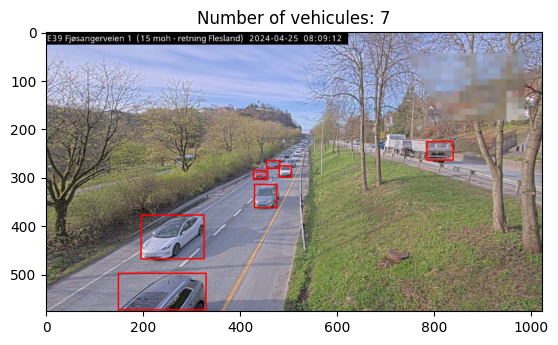

In [67]:
# Cargar imagen de prueba
image = raw_dataset['train'][12]['image']

results = model(image)

from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

results = results[0].boxes
boxes = results.xyxy.numpy()
conf = results.conf.numpy()
classes = results.cls.numpy()
index_list = [2,3,5,7]

draw = ImageDraw.Draw(image)

num_objects = len(boxes)

for box in boxes:
  print(box)
  xmin, ymin, xmax, ymax = box.astype(int)
  draw.rectangle([(xmin, ymin), (xmax, ymax)], outline = 'red', width=3)


array_image = np.array(image)
plt.title(f'Number of vehicules: {num_objects}')
plt.imshow(array_image)